<a href="https://colab.research.google.com/github/anthonyp2002/natural_processing_language/blob/main/EstadisticaDeLenguaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


**Estadistica de Lenguaje**

In [ ]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [ ]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [ ]:
print(len(text1))

260819


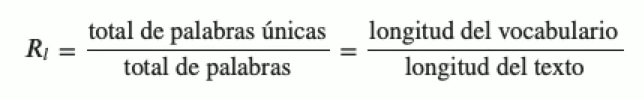


Riqueza Lexica en un texto ....

In [ ]:
vocabulario = sorted(set(text1))
print(vocabulario[1000:1050])

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts', 'Cruelty', 'Cruising', 'Cruppered', 'Crusaders', 'Crushed', 'Crying', 'Cuba', 'Curious', 'Curse', 'Cursed', 'Curses', 'Cussed', 'Customs', 'Cut', 'Cutter', 'Cutting', 'Cuvier', 'Cyclades', 'Czar', 'D', 'DAGGOO', 'DAM', 'DANCE', 'DANCING', 'DANIEL', 'DANISH', 'DARKENS', 'DARWIN', 'DAVENANT', 'DEAD', 'DEATH', 'DEBELL', 'DECK', 'DEL', 'DESTROYED', 'DEVIL', 'DICTIONARY', 'DID', 'DIGNITY', 'DISCOVERS']


In [ ]:
rl = len(vocabulario)/len(text1)
print(rl)

0.07406285585022564


In [ ]:
#Con esta funcion podemos sacar la riqueza_lexica de nuestros textos
def riqueza_lexica (texto):
    vocabulario = sorted(set(texto))
    return len(vocabulario)/len(texto)

riqueza_lexica(text1)

0.07406285585022564

In [ ]:
#Funcion de como sacar un porcentaje de una palabra que aparezca en un texto
def porcentaje_palabra(palabra,texto):
    return 100*texto.count(palabra)/len(texto)

porcentaje_palabra('monster',text1)

0.018786974875296663

In [ ]:
text1.count('monster')

49

In [ ]:
#Diccionarios.....
#Con diccionarios podemos hacer que las palabras aparezacan en un diccionario y alado su numero de veces que aparece
#dentro de un texto asi dic = {'monster':49,'boat':54,.....}
#Una de las formas de hacerlos es utilizando el Metodo FreqDisk de NLTK

fdist = FreqDist(text1)

In [ ]:
#Con esto podemos ver las palabras con mas token
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

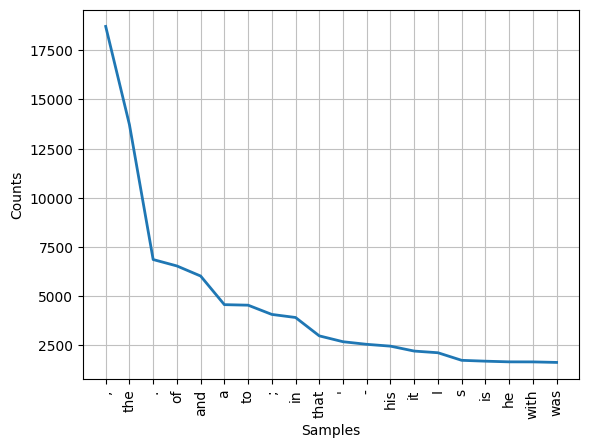

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
#
fdist.plot(20)

In [ ]:
fdist['monster']

#En resumen con el metodo de FreqDisk de NLTK podemos calular distribuciones de
#la aparaicion de palabras en uin texto pero como se ve no siempre se nos aparece
#informacion de las palabras mas importantes del texto

49

# **Distribuciones sobre contenido con filtro-fino**

In [ ]:
#Primero vamos a recorrer todas las palabras y vamos ir agregando algunas palabras
#en esa parte es donde entra el filtro
long_words= [palabra for palabra in text1 if len(palabra)>5]
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

In [ ]:
#Otro metodo de hacer usando stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
long_words = [palabra for palabra in text1 if not palabra in stop_words]
long_words = [palabra for palabra in text1 if len(palabra) > 3]
long_words[:20]

['Moby',
 'Dick',
 'Herman',
 'Melville',
 '1851',
 'ETYMOLOGY',
 'Supplied',
 'Late',
 'Consumptive',
 'Usher',
 'Grammar',
 'School',
 'pale',
 'Usher',
 'threadbare',
 'coat',
 'heart',
 'body',
 'brain',
 'ever']

In [ ]:
#Otro metodo
import re
interesting_words = [(w,fdist[w]) for w in set(text1) if re.search(r'[\w]+',w) and w not in stopwords.words('english') and fdist[w]>10 and len(w)>1]
interesting_words[:20]

[('dignity', 19),
 ('shipped', 11),
 ('word', 76),
 ('dare', 15),
 ('precisely', 27),
 ('hell', 14),
 ('Boy', 15),
 ('simultaneously', 14),
 ('nights', 11),
 ('engaged', 18),
 ('Perth', 18),
 ('added', 25),
 ('character', 14),
 ('written', 11),
 ('scientific', 16),
 ('utterly', 13),
 ('scarce', 12),
 ('canoe', 11),
 ('silently', 14),
 ('unseen', 14)]

In [ ]:
#Con esto podemos tener todas las palabras con la longitud designada con sus respectivas aparicioines en el texto
palabras_interesantes = [(palabra,fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10]
dtypes = [('word','S10'),('frequency',int)]
palabras_interesantes = np.array(palabras_interesantes,dtype = dtypes)

In [ ]:
palabras_interesantes = np.sort(palabras_interesantes, order='frequency')
palabras_interesantes

array([(b'America',  11), (b'Father',  11), (b'Fleece',  11),
       (b'Guernsey',  11), (b'Heaven',  11), (b'NANTUCKET',  11),
       (b'Perseus',  11), (b'Ramadan',  11), (b'Therefore',  11),
       (b'additional',  11), (b'advanced',  11), (b'appearance',  11),
       (b'baleen',  11), (b'barbaric',  11), (b'beating',  11),
       (b'begins',  11), (b'beholding',  11), (b'belong',  11),
       (b'blackness',  11), (b'blanket',  11), (b'blessed',  11),
       (b'butter',  11), (b'central',  11), (b'clothes',  11),
       (b'coiled',  11), (b'commotion',  11), (b'concluding',  11),
       (b'contact',  11), (b'convenient',  11), (b'covered',  11),
       (b'cursed',  11), (b'demanded',  11), (b'desired',  11),
       (b'direct',  11), (b'element',  11), (b'elevated',  11),
       (b'elsewhere',  11), (b'excellent',  11), (b'experience',  11),
       (b'fashion',  11), (b'fashioned',  11), (b'fastened',  11),
       (b'features',  11), (b'fellows',  11), (b'fierce',  11),
       (b'fif

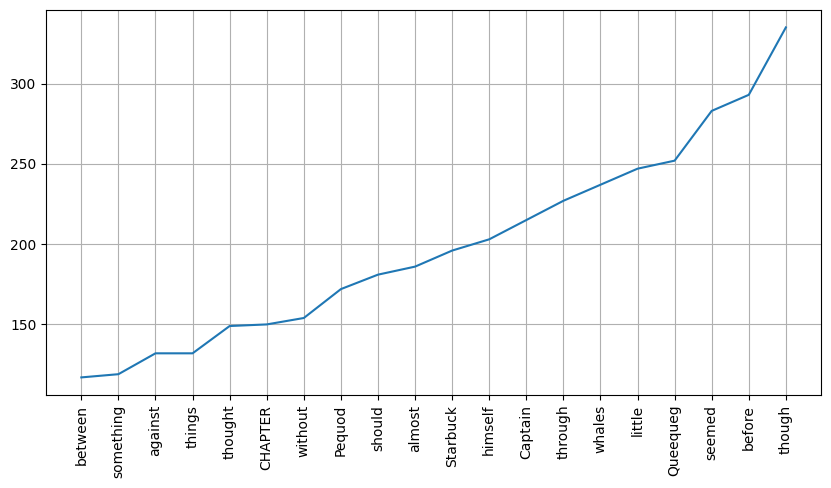

In [ ]:
#Grafica de nuestras palabras mas utilizadas
top_words = 200
palabras_interesantes = np.sort(palabras_interesantes, order = 'frequency')[-top_words:]
x = palabras_interesantes['word']
y = palabras_interesantes['frequency']
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xticks(x,rotation='vertical')
plt.grid(True)
plt.show()

# **N-Grama**
Secuencia de  n palabras cosecutivas

Se divide en :

Bi-Gramas

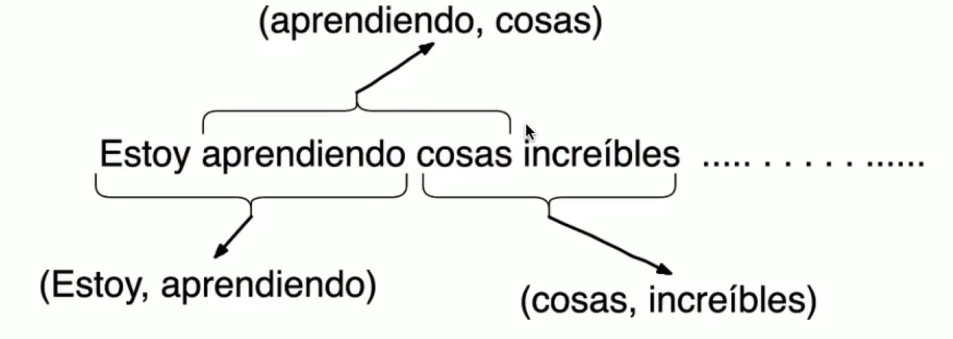

Tri-Gramas

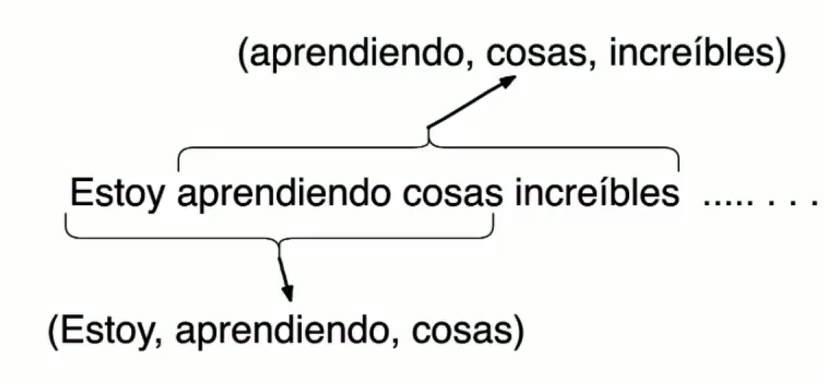

# **Colocaciones**
Las colocaciones de una palabra son sentencias que indican los lugares que acostumbran a tomar esa palabra en el lenguaje "sin seguir las reglas de lenguaje" . Nos hace referencia a que redundancia tiene una palabra dentro de una frase, la cual aparece en una frecuencia inicial. Esto tambien nos hace referencia a las costumbres de otras culturas con el lenguaje

# **Bi-Gramas**

In [ ]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
#Parejas de palabras que ocurren consecutivamente
#Calcula la cantidad de secuencias de palabras que se pueden crear
md_bigrams = list(bigrams(text1))
fdist = FreqDist(md_bigrams)

In [ ]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

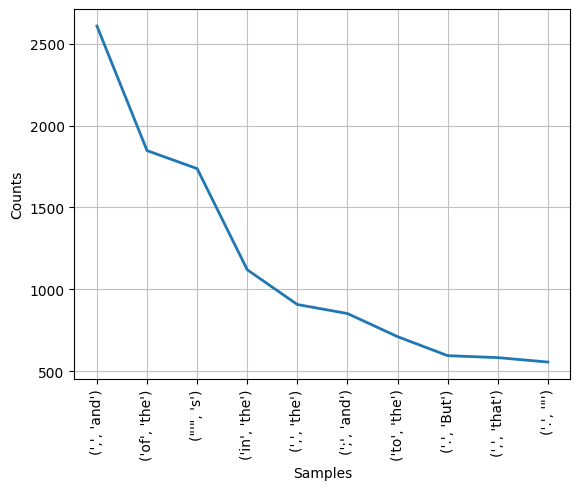

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(10)

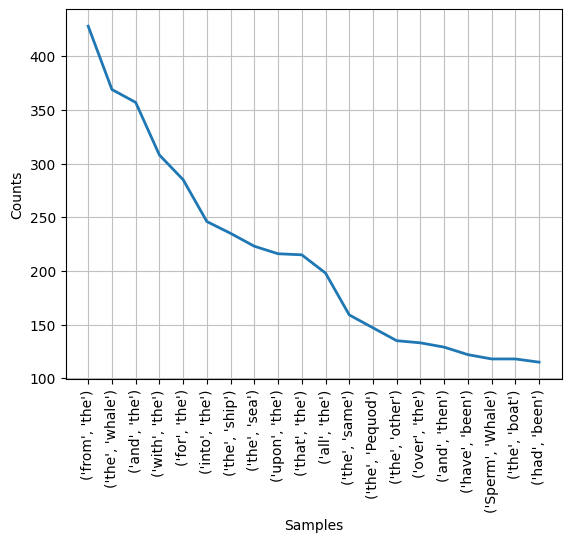

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
#Filtrado de BiGramas

threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

In [ ]:
#Filtrado de Tri_Gramas
from nltk.util import ngrams
md_trigrams = list(ngrams(text1,3))
fdist = FreqDist(md_bigrams)
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

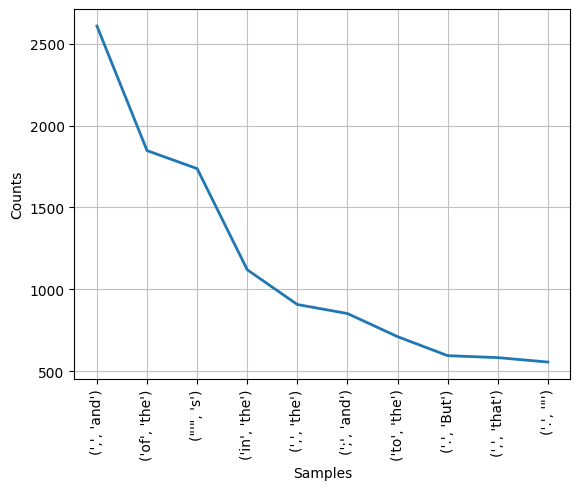

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(10)

COLOCACIONES

In [ ]:
#Ponemos los bigramas en  un dataframe
#Informacion  sobre nuestro digrama

md_bigrams = list(bigrams(text1))

threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_dist = FreqDist(filtered_bigrams)

filtered_word  = [word for word in text1 if len(word)>threshold]
filtered_word_dist = FreqDist(filtered_word)

df = pd.DataFrame()
df['bi_grams']=list(set(filtered_bigrams))
df['word_0']=df['bi_grams'].apply(lambda x: x[0]) #Con el apply puedo sacar de otra columna del dataframe un valor  con lambda ...
df['word_1']=df['bi_grams'].apply(lambda x: x[1])

df['bi_grams_fred'] = df['bi_grams'].apply(lambda x: filtered_dist[x])
df['word_0_fred']= df['word_0'].apply(lambda x: filtered_word_dist[x]) #Con el apply puedo sacar de otra columna del dataframe un valor  con lambda ...
df['word_1_fred']= df['word_1'].apply(lambda x: filtered_word_dist[x])

In [ ]:
df

bi_grams     word_0       word_1  bi_grams_fred  \
0         (broods, within)     broods       within              1   
1           (try, watches)        try      watches              1   
2        (cushioned, seat)  cushioned         seat              1   
3        (other, accounts)      other     accounts              1   
4            (half, known)       half        known              1   
...                    ...        ...          ...            ...   
67937    (more, shrinking)       more    shrinking              1   
67938          (the, only)        the         only             29   
67939       (while, after)      while        after              1   
67940        (very, jolly)       very        jolly              1   
67941  (best, authorities)       best  authorities              1   

       word_0_fred  word_1_fred  
0                2           78  
1               49           12  
2                1           18  
3              412            9  
4              135           80  
...            ...          ...  
67937          501            1  
67938        13721          360  
67939          216          252  
67940          311           22  
67941           62            5  

[67942 rows x 6 columns]

Informacion mutua punto  a punto  (PMI)

$P M I = log (\frac{P(w_1, w_2)}{P(w_1)P(w_2)})$


In [ ]:
df['PMI'] = df[['bi_grams_fred','word_0_fred','word_1_fred']].apply(lambda x: np.log2(x.values[0]/(x.values[1]*x.values[2])),axis =1)
df['log(bi_grams_fred)'] = df['bi_grams_fred'].apply(lambda x: np.log2(x))

In [ ]:
df

bi_grams     word_0       word_1  bi_grams_fred  \
0         (broods, within)     broods       within              1   
1           (try, watches)        try      watches              1   
2        (cushioned, seat)  cushioned         seat              1   
3        (other, accounts)      other     accounts              1   
4            (half, known)       half        known              1   
...                    ...        ...          ...            ...   
67937    (more, shrinking)       more    shrinking              1   
67938          (the, only)        the         only             29   
67939       (while, after)      while        after              1   
67940        (very, jolly)       very        jolly              1   
67941  (best, authorities)       best  authorities              1   

       word_0_fred  word_1_fred        PMI  log(bi_grams_fred)  
0                2           78  -7.285402            0.000000  
1               49           12  -9.199672            0.000000  
2                1           18  -4.169925            0.000000  
3              412            9 -11.856426            0.000000  
4              135           80 -13.398744            0.000000  
...            ...          ...        ...                 ...  
67937          501            1  -8.968667            0.000000  
67938        13721          360 -17.377970            4.857981  
67939          216          252 -15.732167            0.000000  
67940          311           22 -12.740202            0.000000  
67941           62            5  -8.276124            0.000000  

[67942 rows x 8 columns]

In [ ]:
df.sort_values(by  = 'PMI',ascending=False)

bi_grams        word_0       word_1  bi_grams_fred  \
23619   (needing, supervision)       needing  supervision              1   
18375       (homeless, selves)      homeless       selves              1   
10621           (spicin, ',--)        spicin         ',--              1   
59913  (preparatives, needing)  preparatives      needing              1   
59933     (Inquisition, wanes)   Inquisition        wanes              1   
...                        ...           ...          ...            ...   
11797               (man, the)           man          the              1   
57912              (some, the)          some          the              1   
1929                (one, the)           one          the              1   
24764               (the, not)           the          not              1   
54468               (the, but)           the          but              1   

       word_0_fred  word_1_fred        PMI  log(bi_grams_fred)  
23619            1            1   0.000000                 0.0  
18375            1            1   0.000000                 0.0  
10621            1            1   0.000000                 0.0  
59913            1            1   0.000000                 0.0  
59933            1            1   0.000000                 0.0  
...            ...          ...        ...                 ...  
11797          508        13721 -22.732783                 0.0  
57912          578        13721 -22.919024                 0.0  
1929           889        13721 -23.540138                 0.0  
24764        13721         1103 -23.851315                 0.0  
54468        13721         1113 -23.864336                 0.0  

[67942 rows x 8 columns]

Todos estos valores nos da valores menores  a mi y estos deben ser los mas proximos a ceros

In [ ]:
fig = px.scatter(x = df['PMI'].values, y = df['log(bi_grams_fred)'].values, color = df['PMI']+df['log(bi_grams_fred)'],
                 hover_name = df['bi_grams'], width = 600, height = 600, labels = {'x': 'PMI',
                                                                                  'y': 'Log(Bigram Frequency'})
fig.show()



```
# NOtaa...... Las colocaciones nos ayuda para identificar lugares personas
 imporante asta tambien objetas para poder asignar  etiques a palabras o
  expresiones que nos pueden dar informacion del texto
```

# Medidas pre-construidas en NLTK

In [ ]:
# ver documentación https://www.nltk.org/_modules/nltk/metrics/association.html
# Esto tambien lo podemos lograr con esto se una manera mas sencilla
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()   #Incluimos las metricas de PMI .....
finder = BigramCollocationFinder.from_words(text1)

In [ ]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measures.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]



```
# Textos en Español
```



In [ ]:
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.sents()
faltten_corpus = [w for l in corpus for w in l]

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.


In [ ]:
print(faltten_corpus[:50])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.', 'Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto']


In [ ]:
finder =  BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10)
finder.nbest(bigram_measures.pmi,10)

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]